## IMPORTING NECESSARY LIBRARIES

In [444]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,gaussian_kde
from sklearn.mixture import GaussianMixture
import warnings

warnings.filterwarnings("ignore")

## GENERATING DATA POINTS FROM 2 NORMAL DISTRIBUTIONS

In [445]:
X1 = np.random.normal(3,2,100)
X2 = np.random.normal(-3,2,100)
X = np.concatenate((X1,X2))

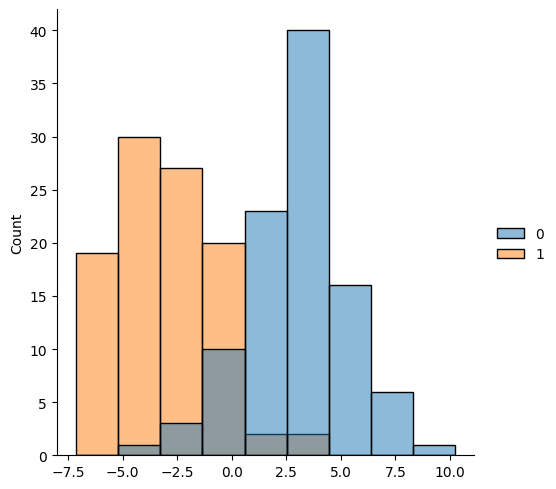

In [446]:
sns.displot([X1,X2])

<Axes: ylabel='Density'>

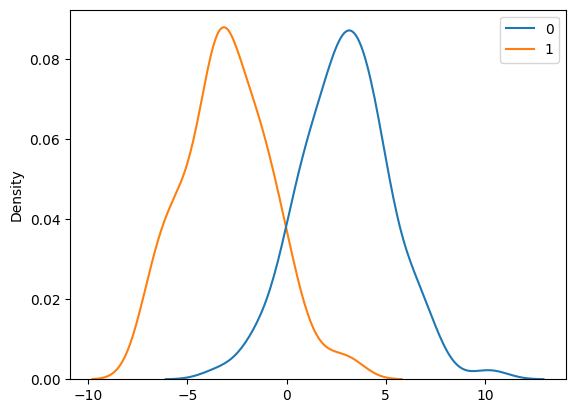

In [447]:
sns.kdeplot([X1,X2])

<Axes: ylabel='Density'>

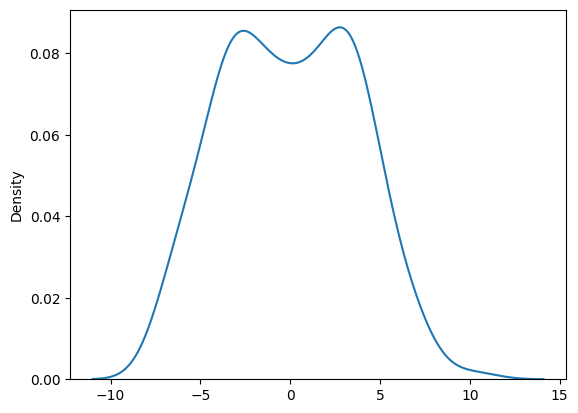

In [448]:
sns.kdeplot(X)

### EXPECTATION MAXIMIZATION ALGORITHM

In [449]:
mean_1,mean_2,= 1,-1
std_1,std_2= 1,1
pi_1,pi_2 = 0.5,0.5

In [450]:
iterations = 200
likelihood = []
iteration_number = []

for iteration in range(1,iterations+1):

    # EXPECTATION STEP

    gamma_1 = pi_1*norm.pdf(X,mean_1,std_1)
    gamma_2 = pi_2*norm.pdf(X,mean_2,std_2)

    total = gamma_1 + gamma_2 

    gamma_1 = gamma_1/total
    gamma_2 = gamma_2/total

    # MAXIMIZATION STEP
    
    pi_1,pi_2 = np.mean(gamma_1),np.mean(gamma_2)
    
    mean_1 = np.sum(gamma_1*X)/np.sum(gamma_1)
    mean_2 = np.sum(gamma_2*X)/np.sum(gamma_2)

    std_1 = (np.sum(gamma_1*(X - mean_1)**2)/np.sum(gamma_1))**0.5
    std_2 = (np.sum(gamma_2*(X - mean_2)**2)/np.sum(gamma_2))**0.5

    log_likelihood = np.sum(np.log(pi_1*norm.pdf(X,mean_1,std_1) + pi_2*norm.pdf(X,mean_2,std_2)))

    iteration_number.append(iteration)
    likelihood.append(log_likelihood)

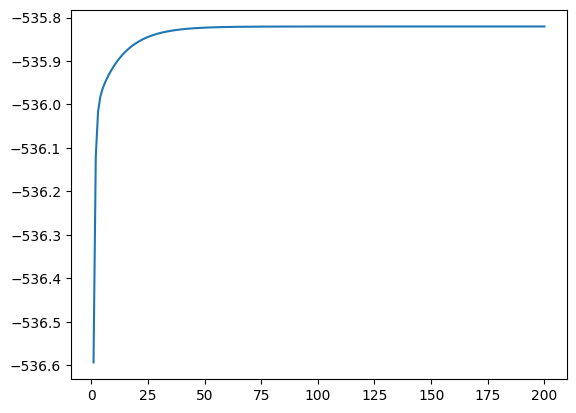

In [451]:
plt.plot(iteration_number,likelihood)

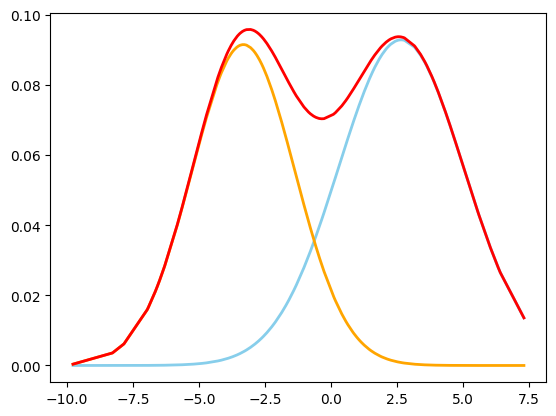

In [452]:
cluster_1 = pi_1*norm.pdf(X_sorted, mean_1,std_1)
cluster_2 = pi_2*norm.pdf(X_sorted, mean_2,std_2)
density_estimation = cluster_1 + cluster_2
plt.plot(X_sorted, cluster_1, color='skyblue', linewidth=2)
plt.plot(X_sorted, cluster_2, color='orange', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)

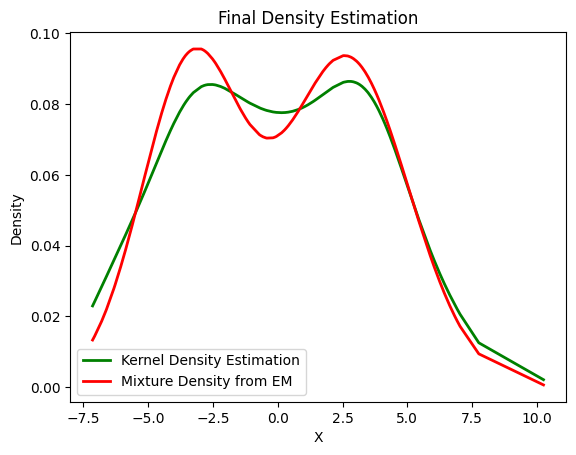

In [453]:
X_sorted = np.sort(X)
density_estimation = (pi_1*norm.pdf(X_sorted, mean_1,std_1) + pi_2*norm.pdf(X_sorted, mean_2,std_2))

plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Final Density Estimation')
plt.legend(['Kernel Density Estimation', 'Mixture Density from EM'])
plt.show()

## GENERATING DATA POINTS FROM 3 NORMAL DISTRIBUTIONS

In [454]:
X1 = np.random.normal(0,2,100)
X2 = np.random.normal(-5,1,100)
X3 = np.random.normal(5,1,100)
X = np.concatenate((X1,X2,X3))

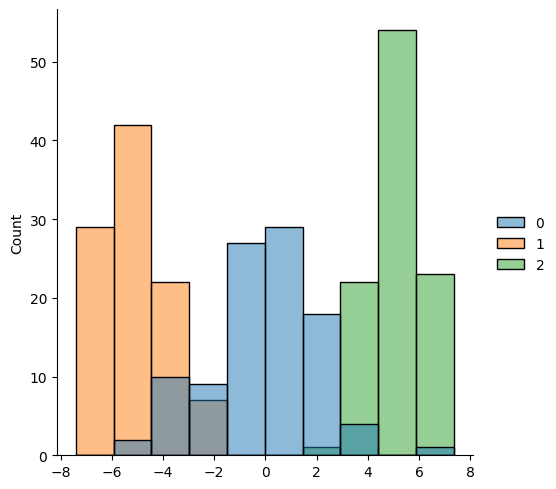

In [455]:
sns.displot([X1,X2,X3])

<Axes: ylabel='Density'>

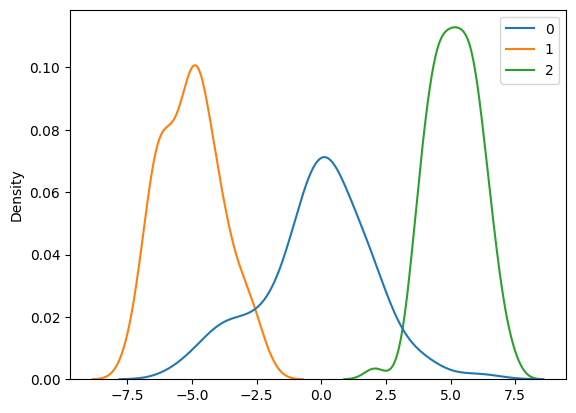

In [456]:
sns.kdeplot([X1,X2,X3])

### EXPECTATION MAXIMIZATION ALGORITHM

#### INITIALIZING THE PARAMETERS

In [457]:
mean_1,mean_2,mean_3 = -1,0,1
std_1,std_2,std_3 = 1,1,1
pi_1,pi_2,pi_3 = 0.4,0.4,0.2

#### ALGORITHM

In [458]:
iterations = 100
likelihood = []
iteration_number = []

for iteration in range(1,iterations+1):

    # EXPECTATION STEP

    gamma_1 = pi_1*norm.pdf(X,mean_1,std_1)
    gamma_2 = pi_2*norm.pdf(X,mean_2,std_2)
    gamma_3 = pi_3*norm.pdf(X,mean_3,std_3)

    total = gamma_1 + gamma_2 + gamma_3

    gamma_1 = gamma_1/total
    gamma_2 = gamma_2/total
    gamma_3 = gamma_3/total

    # MAXIMIZATION STEP
    
    pi_1,pi_2,pi_3 = np.mean(gamma_1),np.mean(gamma_2),np.mean(gamma_3)
    
    mean_1 = np.sum(gamma_1*X)/np.sum(gamma_1)
    mean_2 = np.sum(gamma_2*X)/np.sum(gamma_2)
    mean_3 = np.sum(gamma_3*X)/np.sum(gamma_3)

    std_1 = np.sqrt(np.sum(gamma_1*(X - mean_1)**2)/np.sum(gamma_1))
    std_2 = np.sqrt(np.sum(gamma_2*(X - mean_2)**2)/np.sum(gamma_2))
    std_3 = np.sqrt(np.sum(gamma_3*(X - mean_3)**2)/np.sum(gamma_3))

    log_likelihood = np.sum(np.log(pi_1*norm.pdf(X,mean_1,std_1) + pi_2*norm.pdf(X,mean_2,std_2) + pi_3*norm.pdf(X,mean_3,std_3)))

    iteration_number.append(iteration)
    likelihood.append(log_likelihood)

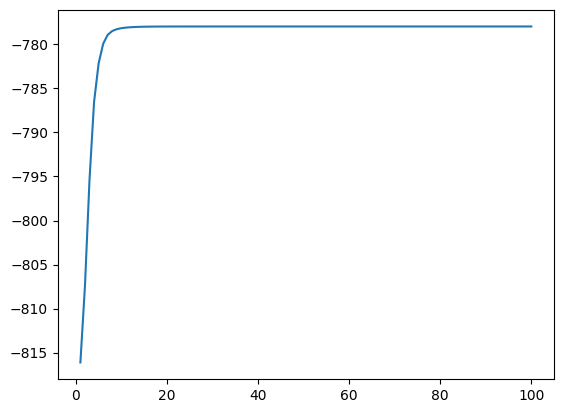

In [459]:
plt.plot(iteration_number,likelihood)

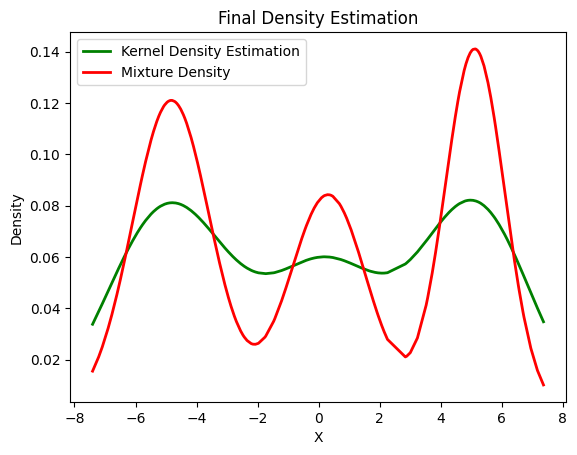

In [460]:
X_sorted = np.sort(X)
density_estimation = (pi_1*norm.pdf(X_sorted, mean_1,std_1) + pi_2*norm.pdf(X_sorted, mean_2,std_2) + pi_3*norm.pdf(X_sorted, mean_3,std_3))

plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Final Density Estimation')
plt.legend(['Kernel Density Estimation', 'Mixture Density'])
plt.show()

## EXPECTATION MAXIMIZATION ALGORITHM AS A FUNCTION

In [472]:
patients = np.random.normal(-5,2,200)
control = np.random.normal(5,2,200)
X = np.concatenate((patients,control))

In [473]:
def EM(X,number_of_clusters=2,number_of_iterations = 300):

    iteration_nums = []
    likelihood = []
    
    means = np.linspace(min(X),max(X),number_of_clusters)
    stds = np.ones(number_of_clusters)
    weights = np.full(number_of_clusters,1.0/number_of_clusters)

    for iteration in range(1,number_of_iterations):
        contribution = []
        
        for i in range(number_of_clusters):
            contribution.append(weights[i]*norm.pdf(X,means[i],stds[i]))
    
        contribution = np.array(contribution)/np.sum(contribution,axis=0)
        
        for i in range(number_of_clusters):
            weights[i] = np.mean(contribution[i])
            means[i] = np.sum(contribution[i]*X)/np.sum(contribution[i])
            stds[i] = np.sqrt(np.sum(contribution[i]*(X - means[i])**2)/np.sum(contribution[i]))

        # log_likelihood = 0
        # for data_point in X:
        #     probability = 0
        #     for i in range(number_of_clusters):
        #         probability+=weights[i]*norm.pdf(data_point,means[i],stds[i])
        #     log_likelihood+=np.log(probability)

        log_likelihood = np.sum(np.log(np.sum([weights[i]*norm.pdf(X,means[i],stds[i]) for i in range(2)],axis=0)))
        
        if iteration>10 and np.array_equal(np.full(10,np.round(log_likelihood,2)),np.round(likelihood[-10:],2)):
            break
        else:
            likelihood.append(log_likelihood)
            iteration_nums.append(iteration)

    return likelihood,iteration_nums,means,stds,weights

In [474]:
likelihood,iteration_nums,means,stds,weights = EM(X,number_of_clusters=2)

In [475]:
print('Means:',means)
print('Standard Devitations:',stds)
print('Weights:',weights)

Means: [-4.93540377  4.9340164 ]
Standard Devitations: [2.1608135 1.8238841]
Weights: [0.50497861 0.49502139]


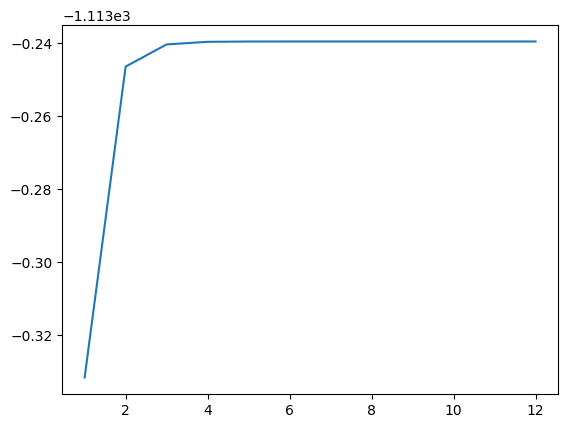

In [476]:
plt.plot(iteration_nums,likelihood)

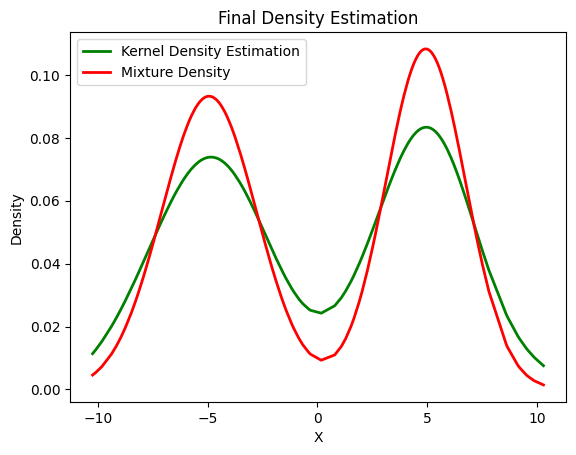

In [477]:
X_sorted = np.sort(X)
density_estimation = np.sum(weights[i]*norm.pdf(X_sorted, means[i],stds[i]) for i in range(2))

plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('Density')
plt.title('Final Density Estimation')
plt.legend(['Kernel Density Estimation', 'Mixture Density'])
plt.show()

### ESTIMATING IDEAL NUMBER OF CLUSTERS BASED ON MAXIMUM LIKELIHOOD

In [488]:
number_of_clusters = 5
means = np.linspace(-20,20,number_of_clusters)
stds = np.ones(number_of_clusters)

X = np.array([])
for i in range(number_of_clusters):
    generated_points = np.random.normal(means[i],stds[i],100)
    X = np.concatenate((X,generated_points))

X.shape

(500,)

In [492]:
likelihood,iteration_nums,means,stds,weights = EM(X,number_of_clusters=3)

In [493]:
print('Means:',means)
print('Standard Devitations:',stds)
print('Weights:',weights)
print('Likelihood:', likelihood[-1])

Means: [-19.98562912  -0.05377689  20.17013616]
Standard Devitations: [0.91868869 9.20316086 0.98239197]
Weights: [0.18424945 0.63138515 0.1843654 ]
Likelihood: -2105.254126451108


2 3 4 5 6 7 8 9 

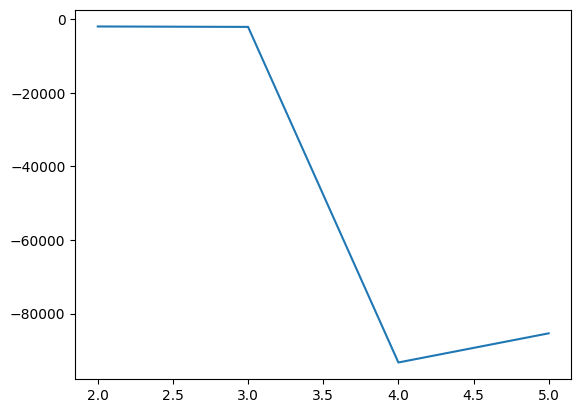

In [494]:
number_of_clusters = []
likelihood_values = []
for cluster_number in range(2,10):
    print(cluster_number,end = ' ')
    likelihood,iteration_nums,means,stds,weights = EM(X,number_of_clusters=cluster_number)
    number_of_clusters.append(cluster_number)
    likelihood_values.append(likelihood[-1])

plt.plot(number_of_clusters,likelihood_values)